# TASK 1- Iris Flower Classification.
Author - Neha Bansode

# Importing all Necessary Libraries

In [ ]:
# import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Importing Dataset

In [3]:
df= pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.shape

(150, 6)

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
df.drop('Id',axis=1,inplace=True)

In [16]:
data = pd.DataFrame(df)

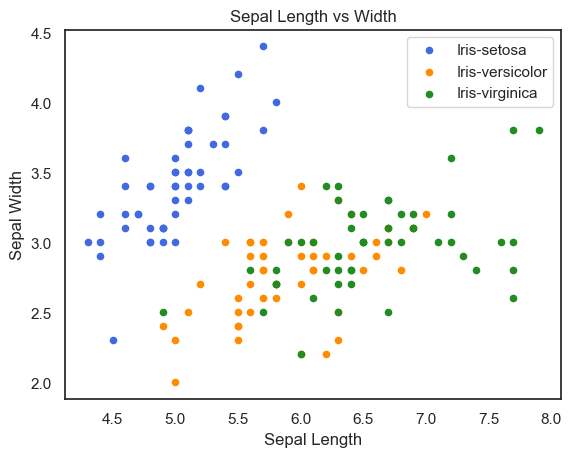

In [19]:
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='royalblue', label='Iris-setosa')
df[df.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='darkorange', label='Iris-versicolor', ax=fig)
df[df.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='forestgreen', label='Iris-virginica', ax=fig)
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length vs Width')
plt.show()

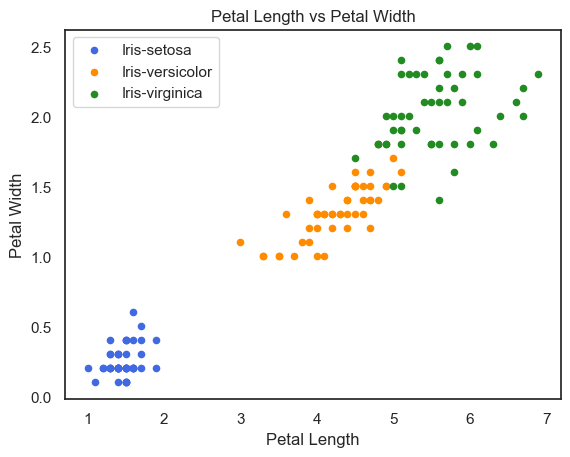

In [20]:
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='royalblue', label='Iris-setosa')
df[df.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='darkorange', label='Iris-versicolor', ax=fig)
df[df.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='forestgreen', label='Iris-virginica', ax=fig)
fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length vs Petal Width')
plt.show()

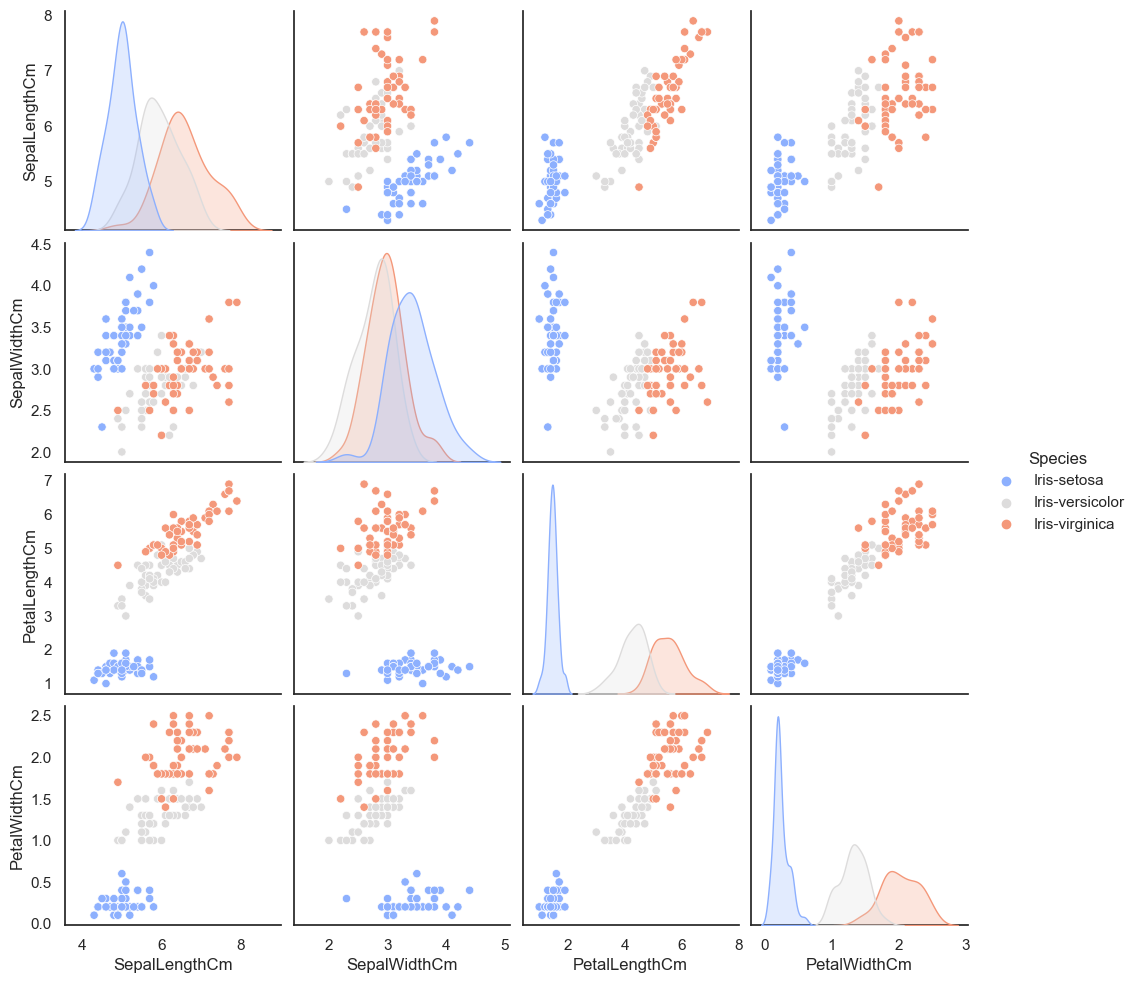

In [22]:
sns.pairplot(df, hue='Species', palette='coolwarm')

In [24]:
X = df.drop('Species', axis=1)
y = df['Species']

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def train_logistic_regression(X_train, y_train):
    """Train a Logistic Regression model."""
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    return classifier
def evaluate_model(classifier, X_test, y_test):
    """Evaluate the Logistic Regression model."""
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    return cm, cr, acc
# Training
classifier = train_logistic_regression(X_train, y_train)
# Evaluation
cm, cr, acc = evaluate_model(classifier, X_test, y_test)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)
print("\nAccuracy Score:", acc)


Confusion Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38


Accuracy Score: 0.9736842105263158


In [27]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def train_svm(X_train, y_train):
    """Train an SVM model."""
    classifier = svm.SVC()
    classifier.fit(X_train, y_train)
    return classifier

def evaluate_model(classifier, X_test, y_test):
    """Evaluate the SVM model."""
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    return cm, cr, acc

# Training
classifier1 = train_svm(X_train, y_train)

# Evaluation
cm, cr, acc = evaluate_model(classifier1, X_test, y_test)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)
print("\nAccuracy Score:", acc)

Confusion Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38


Accuracy Score: 0.9736842105263158


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def train_decision_tree(X_train, y_train):
    """Train a Decision Tree model."""
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    return classifier
def evaluate_model(classifier, X_test, y_test):
    """Evaluate the Decision Tree model."""
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    return cm, cr, acc
# Training
classifier2 = train_decision_tree(X_train, y_train)
# Evaluation
cm, cr, acc = evaluate_model(classifier2, X_test, y_test)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)
print("\nAccuracy Score:", acc)

Confusion Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38


Accuracy Score: 0.9736842105263158


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def train_knn(X_train, y_train, n_neighbors=5):
    """Train a K-Nearest Neighbors model."""
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier.fit(X_train, y_train)
    return classifier
def evaluate_model(classifier, X_test, y_test):
    """Evaluate the KNN model."""
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    return cm, cr, acc
# Training
classifier3 = train_knn(X_train, y_train, n_neighbors=5)
# Evaluation
cm, cr, acc = evaluate_model(classifier3, X_test, y_test)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)
print("\nAccuracy Score:", acc)

Confusion Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38


Accuracy Score: 0.9736842105263158


# Creating Petals And Sepals Training Data

In [32]:
petal = df[['PetalLengthCm', 'PetalWidthCm', 'Species']]
sepal = df[['SepalLengthCm', 'SepalWidthCm', 'Species']]

In [33]:
from sklearn.model_selection import train_test_split

# Splitting the petal dataset
train_p, test_p = train_test_split(petal, test_size=0.3, random_state=0)
train_x_p = train_p[['PetalLengthCm', 'PetalWidthCm']]
train_y_p = train_p['Species']
test_x_p = test_p[['PetalLengthCm', 'PetalWidthCm']]
test_y_p = test_p['Species']

# Splitting the sepal dataset
train_s, test_s = train_test_split(sepal, test_size=0.3, random_state=0)
train_x_s = train_s[['SepalLengthCm', 'SepalWidthCm']]
train_y_s = train_s['Species']
test_x_s = test_s[['SepalLengthCm', 'SepalWidthCm']]
test_y_s = test_s['Species']

In [34]:
from sklearn import metrics 

In [35]:
# Train and evaluate using petal features
model.fit(train_x_p, train_y_p)
prediction_p = model.predict(test_x_p)
accuracy_p = metrics.accuracy_score(test_y_p, prediction_p)
print('The accuracy of Logistic Regression using Petals is:', accuracy_p)

# Train and evaluate using sepal features
model.fit(train_x_s, train_y_s)
prediction_s = model.predict(test_x_s)
accuracy_s = metrics.accuracy_score(test_y_s, prediction_s)
print('The accuracy of Logistic Regression using Sepals is:', accuracy_s)

The accuracy of Logistic Regression using Petals is: 0.9777777777777777
The accuracy of Logistic Regression using Sepals is: 0.8222222222222222


In [36]:
# Train and evaluate using petal features
model.fit(train_x_p, train_y_p)
prediction_p = model.predict(test_x_p)
accuracy_p = metrics.accuracy_score(test_y_p, prediction_p)
print('The accuracy of SVM using Petals is:', accuracy_p)

# Train and evaluate using sepal features
model.fit(train_x_s, train_y_s)
prediction_s = model.predict(test_x_s)
accuracy_s = metrics.accuracy_score(test_y_s, prediction_s)
print('The accuracy of SVM using Sepals is:', accuracy_s)

The accuracy of SVM using Petals is: 0.9777777777777777
The accuracy of SVM using Sepals is: 0.8222222222222222


In [37]:
# Train and evaluate using petal features
model.fit(train_x_p, train_y_p)
prediction_p = model.predict(test_x_p)
accuracy_p = metrics.accuracy_score(test_y_p, prediction_p)
print('The accuracy of the Decision Tree using Petals is:', accuracy_p)

# Train and evaluate using sepal features
model.fit(train_x_s, train_y_s)
prediction_s = model.predict(test_x_s)
accuracy_s = metrics.accuracy_score(test_y_s, prediction_s)
print('The accuracy of the Decision Tree using Sepals is:', accuracy_s)

The accuracy of the Decision Tree using Petals is: 0.9777777777777777
The accuracy of the Decision Tree using Sepals is: 0.8222222222222222


In [38]:
# Train and evaluate using petal features
model.fit(train_x_p, train_y_p)
prediction_p = model.predict(test_x_p)
accuracy_p = metrics.accuracy_score(test_y_p, prediction_p)
print('The accuracy of KNN using Petals is:', accuracy_p)

# Train and evaluate using sepal features
model.fit(train_x_s, train_y_s)
prediction_s = model.predict(test_x_s)
accuracy_s = metrics.accuracy_score(test_y_s, prediction_s)
print('The accuracy of KNN using Sepals is:', accuracy_s)

The accuracy of KNN using Petals is: 0.9777777777777777
The accuracy of KNN using Sepals is: 0.8222222222222222
